In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("./data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


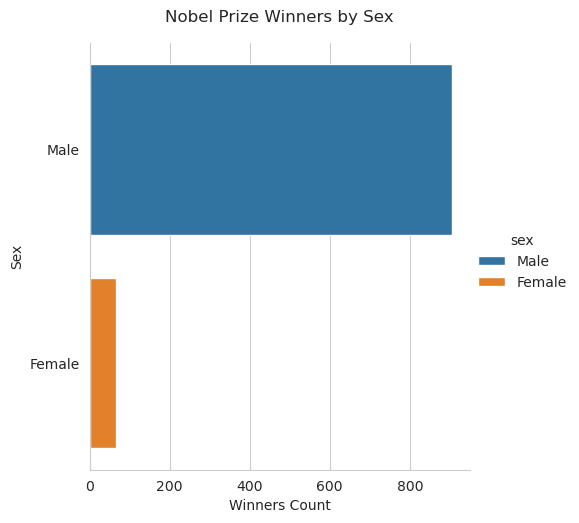

In [3]:
# What is the most commonly awarded gender?
sns.catplot(y='sex', kind='count', hue='sex', data=df)
plt.title('Nobel Prize Winners by Sex', y=1.03)
plt.xlabel('Winners Count')
plt.ylabel('Sex')
plt.show()

top_gender = df['sex'].value_counts().index[0]

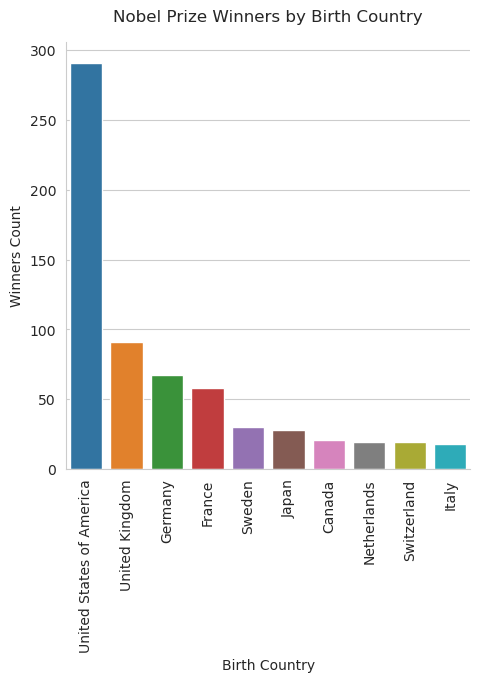

In [4]:
# What is the most commonly awarded birth country?
sns.catplot(x='birth_country', y='count', hue='birth_country', kind='bar', data=df['birth_country'].value_counts().reset_index().head(10), legend=False)
plt.title('Nobel Prize Winners by Birth Country', y=1.03)
plt.xlabel('Birth Country')
plt.ylabel('Winners Count')
plt.xticks(rotation=90)
plt.show()

top_country = df['birth_country'].value_counts().index[0]

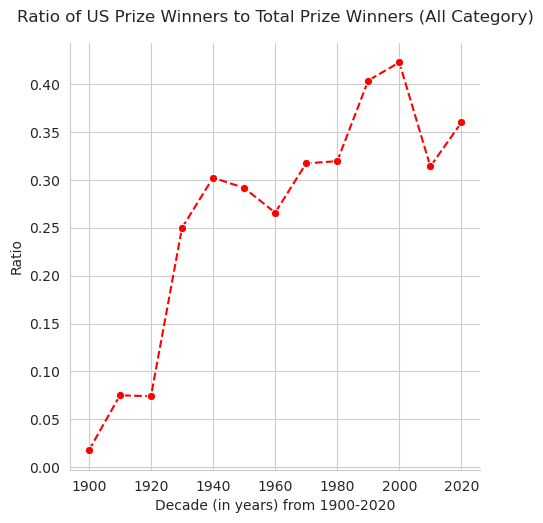

In [5]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
df['decade'] = df['year'] // 10 * 10
usa_total = df.query('birth_country=="United States of America"')['decade'].value_counts().reset_index()
all_total = df['decade'].value_counts().reset_index()
usa_total
merged = all_total.merge(usa_total, on="decade", how="inner", suffixes=['_all', '_usa'])
merged['ratio'] = merged['count_usa'] / merged['count_all']
max_decade_usa = int(merged[merged['ratio'] == merged['ratio'].max()]['decade'].iloc[0])

sns.relplot(x='decade', y='ratio', kind='line', marker="o", linestyle="--", color="red", data=merged)
plt.xlabel('Decade (in years) from 1900-2020')
plt.ylabel('Ratio')
plt.title('Ratio of US Prize Winners to Total Prize Winners (All Category)', y=1.03)
plt.show()

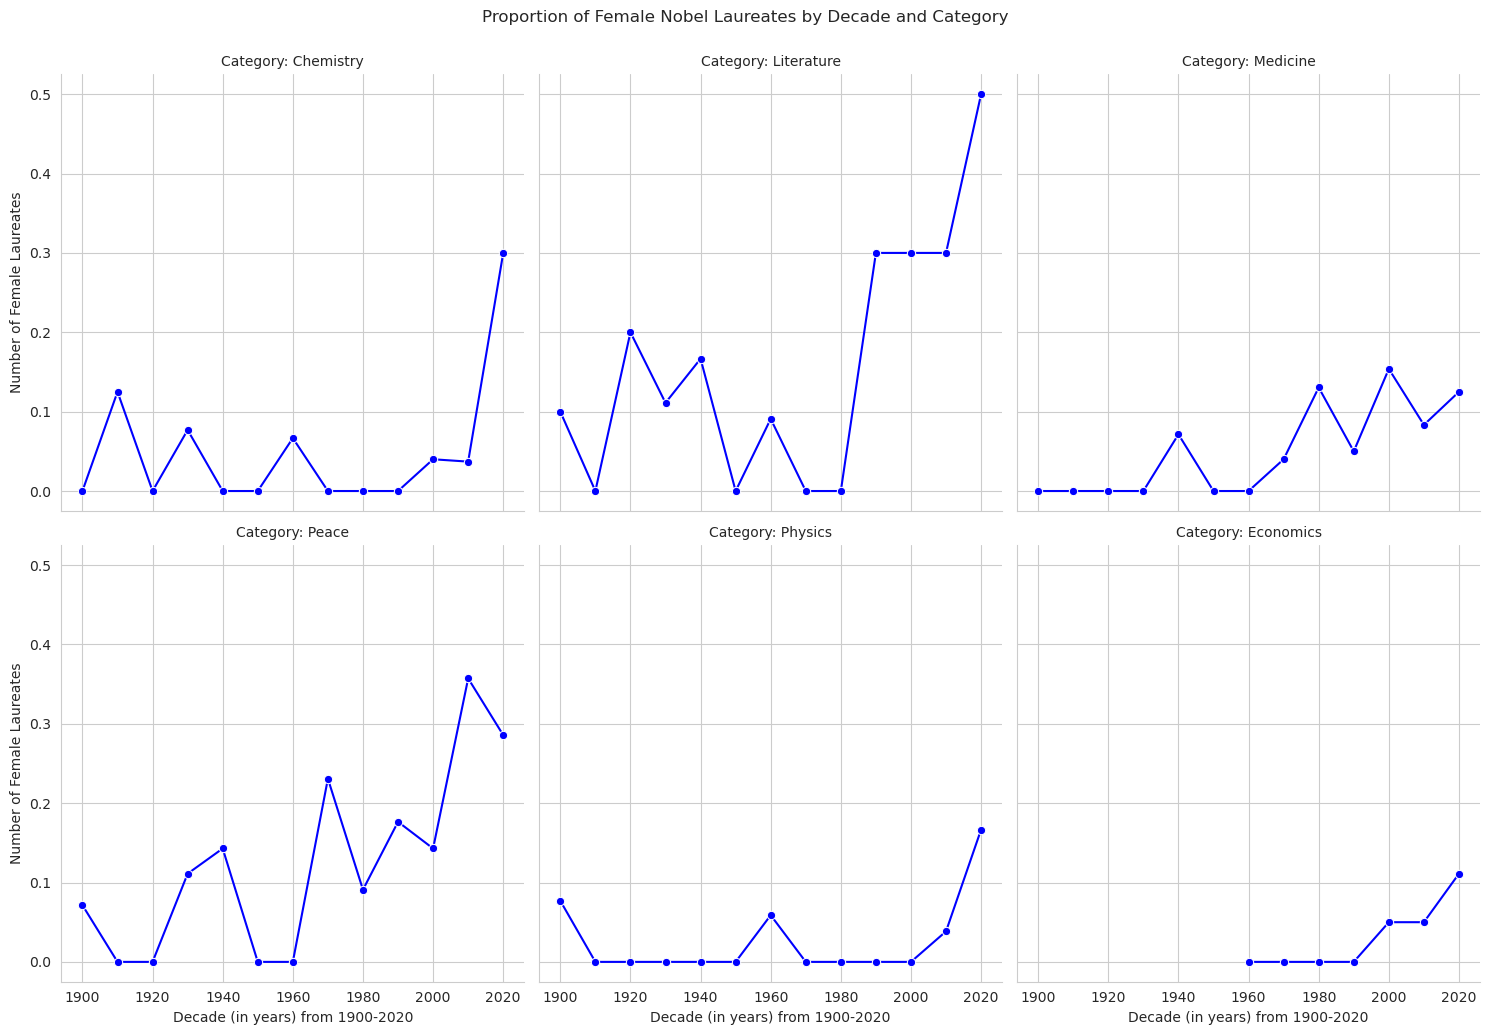

In [7]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. 
# There should only be one key:value pair.

df['female_winner'] = df['sex'] == 'Female'
female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
g = sns.relplot(x='decade', y='female_winner', kind='line', marker="o", data=female_winners, col='category', color='blue', col_wrap=3)
plt.suptitle("Proportion of Female Nobel Laureates by Decade and Category", y=1.03)
g.set_axis_labels("Decade (in years) from 1900-2020", "Number of Female Laureates")
g.set_titles("Category: {col_name}")
plt.show()

max_female_winners = female_winners[female_winners['female_winner'] == female_winners['female_winner'].max()]
max_female_dict = {int(max_female_winners.iloc[0, 0]): max_female_winners.iloc[0, 1]}

In [15]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_woman_nobel_prize = df[df['sex'] == 'Female'].sort_values('year').iloc[0, :]
first_woman_name = first_woman_nobel_prize['full_name']
first_woman_category = first_woman_nobel_prize['category']
print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


In [24]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
# Store the full names in a list named repeat_list.
ind_or_org_counts = df['full_name'].value_counts().reset_index()
repeat_list = list(ind_or_org_counts[ind_or_org_counts['count'] > 1].loc[:, "full_name"])
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Marie Curie, née Sklodowska',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger']